# ___Portuguese bank marketing dataset___

## ___Import libraries___

In [14]:
# loading data using .env file
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer, OneHotEncoder
from sklearn.model_selection import train_test_split
from scipy import stats
from dotenv import load_dotenv

dotenv_path = os.getcwd()+'\\local.env'
load_dotenv(dotenv_path=dotenv_path)

%matplotlib inline

## ___Import dataset___

In [297]:
df = pd.read_csv(os.getenv('bank_data'), sep=';')
col_additional =['age','job','marital','education','default','housing','loan','contact','month',\
      'day_of_week','duration','campaign','pdays','previous','poutcome','emp_var_rate',\
      'cons_price_idx','cons_conf_idx','euribor3m','nr_employed','y']
df_additional = pd.read_csv(os.getenv('bank_additional_data'), sep=';')
df_additional.columns = col_additional
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [298]:
df.shape

(45211, 17)

In [299]:
df = df_additional

In [300]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [8]:
for i in df:
    if df[i].dtype in ['object', 'bool']:
        print(f'___________{i}__________')
        print(df[i].value_counts())

___________job__________
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
___________marital__________
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
___________education__________
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
___________default__________
no         32588
unknown     8597
yes            3
Name: default, dtype: int64
___________housing__________
yes        21576
no         18622
unknown      990
Name: housing, dtype: int64
___________loan__________
no         

In [11]:
df.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [15]:
df.marital.replace('unknown', np.nan, inplace=True)

In [18]:
from sklearn.impute import SimpleImputer

In [32]:
imp = SimpleImputer(strategy='most_frequent')

df['marital'] = imp.fit_transform(np.array(df.marital).reshape(-1,1))

In [35]:
df.marital.value_counts()

married     25008
single      11568
divorced     4612
Name: marital, dtype: int64

In [37]:
df.drop('contact', axis=1, inplace=True)

In [38]:
df.shape

(41188, 20)

In [41]:
df_marital_inst = pd.crosstab(df.marital, df.y)

In [43]:
df_marital_inst

y,no,yes
marital,,
divorced,4136,476
married,22464,2544
single,9948,1620


In [65]:
df_marital_inst = df_marital_inst.append({'no': df_marital_inst.no.sum(), 'yes':df_marital_inst.yes.sum()}, ignore_index=True, verify_integrity=True)

In [67]:
df_marital_inst.index = ['divorced', 'married', 'single', 'total']

In [70]:
df_marital_inst['total'] = df_marital_inst['no'] + df_marital_inst['yes']

In [72]:
df_marital_inst['purchased'] = (df_marital_inst['yes']/df_marital_inst['total']) * 100

In [73]:
df_marital_inst

,no,yes,total,purchased
divorced,4136,476,4612,10.320902
married,22464,2544,25008,10.172745
single,9948,1620,11568,14.004149
total,36548,4640,41188,11.265417


In [89]:
df_job_inst = pd.crosstab(df.job, df.y)

In [90]:
df_job_inst

y,no,yes
job,,
admin.,9070,1352
blue-collar,8616,638
entrepreneur,1332,124
housemaid,954,106
management,2596,328
retired,1286,434
self-employed,1272,149
services,3646,323
student,600,275


In [91]:
df_job_inst['purchase_perc'] = (df_job_inst.yes)*100/(df_job_inst.no+df_job_inst.yes)
df_job_inst

y,no,yes,purchase_perc
job,,,
admin.,9070,1352,12.972558
blue-collar,8616,638,6.894316
entrepreneur,1332,124,8.516484
housemaid,954,106,10.000000
management,2596,328,11.217510
retired,1286,434,25.232558
self-employed,1272,149,10.485574
services,3646,323,8.138070
student,600,275,31.428571


In [94]:
df_job_inst.sort_values('purchase_perc', ascending=False, inplace=True)

In [95]:
df_job_inst

y,no,yes,purchase_perc
job,,,
student,600,275,31.428571
retired,1286,434,25.232558
unemployed,870,144,14.201183
admin.,9070,1352,12.972558
management,2596,328,11.217510
unknown,293,37,11.212121
technician,6013,730,10.826042
self-employed,1272,149,10.485574
housemaid,954,106,10.000000


<AxesSubplot:ylabel='job'>

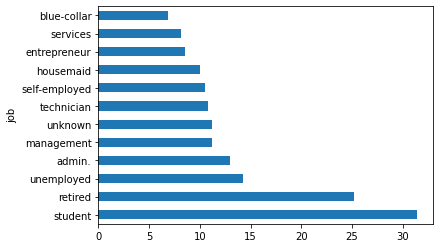

In [98]:
df_job_inst.purchase_perc.plot.barh()

In [102]:
df_week_inst = pd.crosstab(df.day_of_week, df.y)
df_week_inst['purchase_perc'] = df_week_inst.yes*100/(df_week_inst.no+df_week_inst.yes)
df_month_inst = pd.crosstab(df.month, df.y)
df_month_inst['purchase_perc'] = df_month_inst.yes*100/(df_month_inst.no+df_month_inst.yes)

In [103]:
df_month_inst

y,no,yes,purchase_perc
month,,,
apr,2093,539,20.478723
aug,5523,655,10.602137
dec,93,89,48.901099
jul,6525,649,9.046557
jun,4759,559,10.511470
mar,270,276,50.549451
may,12883,886,6.434745
nov,3685,416,10.143867
oct,403,315,43.871866


<AxesSubplot:ylabel='month'>

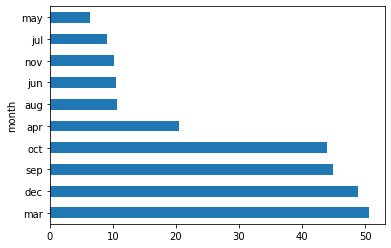

In [106]:
df_month_inst.sort_values('purchase_perc', ascending=False, inplace=True)
df_month_inst.purchase_perc.plot.barh()

<AxesSubplot:ylabel='day_of_week'>

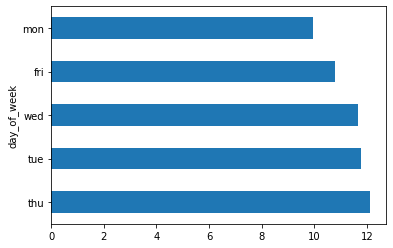

In [107]:
df_week_inst.sort_values('purchase_perc', ascending=False, inplace=True)
df_week_inst.purchase_perc.plot.barh()

In [117]:
df2 = df[(df.default=='no') & (df.housing=='no') & (df.loan == 'no')]
df3 = df[(df.default=='no') & (df.housing=='no') & (df.loan == 'yes')]
df4 = df[(df.default=='no') & (df.housing=='yes') & (df.loan == 'no')]
df5 = df[(df.default=='yes') & (df.housing=='no') & (df.loan == 'no')]
df6 = df[(df.default=='no') & (df.housing=='yes') & (df.loan == 'yes')]
df7 = df[(df.default=='yes') & (df.housing=='yes') & (df.loan == 'no')]
df8 = df[(df.default=='yes') & (df.housing=='no') & (df.loan == 'yes')]
df9 = df[(df.default=='yes') & (df.housing=='yes') & (df.loan == 'yes')]

In [136]:
df_def_single = pd.concat([df3, df4, df5], axis=0)
df_def_single['type'] = 'single'
df_def_two = pd.concat([df6,df7,df8], axis=0)
df_def_two['type'] = 'two'

In [137]:
df2['type'] = 'no_def'

<ipython-input-137-201458b0fe97>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['type'] = 'no_def'


In [144]:
df9.shape

(0, 21)

In [143]:
df9['type'] = 'all'
df_def = pd.concat([df_def_single, df_def_two, df2, df9], axis=0)
df_def_inst = pd.crosstab(df_def.type, df_def.y)
df_def_inst

y,no,yes
type,,
no_def,11037,1569
single,14094,2159
two,2596,373


<AxesSubplot:ylabel='type'>

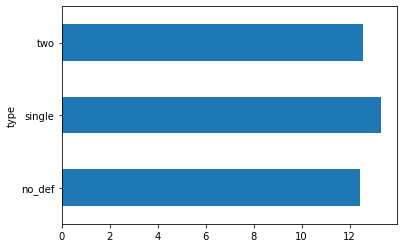

In [142]:
df_def_inst['purchase_perc'] = df_def_inst.yes*100/(df_def_inst.yes+df_def_inst.no)
df_def_inst.purchase_perc.plot.barh()

In [151]:
df.duration = df.duration/60

81.96666666666667

In [155]:
dur_range = list(range(0,100,10))

df_dur = df.duration

In [172]:
import math

df['dur_bin'] = df.duration.map(lambda x: int(math.floor(x/10)*10))

In [174]:
df_dur_inst = pd.crosstab(df.dur_bin, df.y)

In [175]:
df_dur_inst['purchase_perc'] = df_dur_inst.yes*100/(df_dur_inst.yes+df_dur_inst.no)
df_dur_inst

y,no,yes,purchase_perc
dur_bin,,,
0,34760,2950,7.822859
10,1594,1369,46.203172
20,153,261,63.043478
30,28,42,60.000000
40,4,12,75.000000
50,7,3,30.000000
60,1,3,75.000000
80,1,0,0.000000


<AxesSubplot:ylabel='dur_bin'>

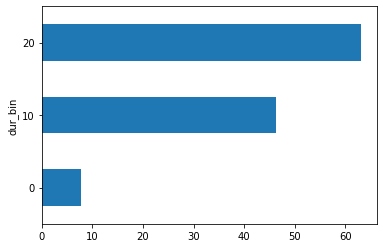

In [187]:
df_dur_inst.purchase_perc[:3].plot.barh()

In [179]:
df_cpi_inst = pd.crosstab(df.cons_price_idx, df.y)
df_cci_inst = pd.crosstab(df.cons_conf_idx, df.y)

In [181]:
df_evr_inst = pd.crosstab(df.emp_var_rate, df.y)

In [183]:
df.euribor3m.unique()

array([4.857, 4.856, 4.855, 4.859, 4.86 , 4.858, 4.864, 4.865, 4.866,
       4.967, 4.961, 4.959, 4.958, 4.96 , 4.962, 4.955, 4.947, 4.956,
       4.966, 4.963, 4.957, 4.968, 4.97 , 4.965, 4.964, 5.045, 5.   ,
       4.936, 4.921, 4.918, 4.912, 4.827, 4.794, 4.76 , 4.733, 4.7  ,
       4.663, 4.592, 4.474, 4.406, 4.343, 4.286, 4.245, 4.223, 4.191,
       4.153, 4.12 , 4.076, 4.021, 3.901, 3.879, 3.853, 3.816, 3.743,
       3.669, 3.563, 3.488, 3.428, 3.329, 3.282, 3.053, 1.811, 1.799,
       1.778, 1.757, 1.726, 1.703, 1.687, 1.663, 1.65 , 1.64 , 1.629,
       1.614, 1.602, 1.584, 1.574, 1.56 , 1.556, 1.548, 1.538, 1.531,
       1.52 , 1.51 , 1.498, 1.483, 1.479, 1.466, 1.453, 1.445, 1.435,
       1.423, 1.415, 1.41 , 1.405, 1.406, 1.4  , 1.392, 1.384, 1.372,
       1.365, 1.354, 1.344, 1.334, 1.327, 1.313, 1.299, 1.291, 1.281,
       1.266, 1.25 , 1.244, 1.259, 1.264, 1.27 , 1.262, 1.26 , 1.268,
       1.286, 1.252, 1.235, 1.224, 1.215, 1.206, 1.099, 1.085, 1.072,
       1.059, 1.048,

In [191]:
df_dur_inst

y,no,yes,purchase_perc
dur_bin,,,
0,34760,2950,7.822859
10,1594,1369,46.203172
20,153,261,63.043478
30,28,42,60.000000
40,4,12,75.000000
50,7,3,30.000000
60,1,3,75.000000
80,1,0,0.000000


In [192]:
pd.crosstab(df.job, df[df.y=='yes'].y)

y,yes
job,
admin.,1352
blue-collar,638
entrepreneur,124
housemaid,106
management,328
retired,434
self-employed,149
services,323
student,275


In [195]:
df_cpi_inst

y,no,yes
cons_price_idx,,
92.201,506,264
92.379,161,106
92.431,267,180
92.469,112,66
92.649,189,168
92.713,84,88
92.756,9,1
92.843,156,126
92.893,5270,524


In [206]:
df12 = pd.crosstab(df.poutcome,df.y)
df12['pur_perc'] = df12.yes*100/(df12.yes+df12.no)
df12

y,no,yes,pur_perc
poutcome,,,
failure,3647,605,14.228598
nonexistent,32422,3141,8.832213
success,479,894,65.112891


In [208]:
df13 = df[(df.poutcome == 'nonexistent')]
pd.crosstab(df13.job, df13.y)

y,no,yes
job,,
admin.,8002,901
blue-collar,7740,509
entrepreneur,1175,102
housemaid,881,67
management,2279,219
retired,1078,254
self-employed,1131,115
services,3212,239
student,446,148


In [209]:
from scipy.stats import zscore

In [212]:
z_dict = {}
for i in df:
    if df[i].dtype in ['int64', 'float64']:
        zs = zscore(df[i])
        max_z, min_z = max(zs), min(zs)
        count_max, count_min = df[np.abs(zs) >= 3].shape[0], df[np.abs(zs) <= 3].shape[0]
        z_dict.update(**{
            i: [zs,max_z, min_z, count_max, count_min]
        })

In [215]:
for key, value in z_dict.items():
    print(key, "   ", value[1:])

age     [5.56330992054037, -2.209364515079587, 369, 40819]
duration     [17.972018887584845, -0.9961774683218387, 861, 40327]
campaign     [19.289817656857775, -0.5659219741930245, 869, 40319]
pdays     [0.1954139001271294, -5.149443399703285, 1515, 39673]
previous     [13.79491813055649, -0.34949428419757467, 1064, 40124]
emp_var_rate     [0.8390606499069391, -2.2164334831764108, 0, 41188]
cons_price_idx     [2.0581680488803182, -2.374889330361351, 0, 41188]
cons_conf_idx     [2.9391062840969755, -2.2249534387270913, 0, 41188]
euribor3m     [0.8208530662460226, -1.722350916640379, 0, 41188]
nr_employed     [0.8451700929271477, -2.8156965971113914, 0, 41188]
dur_bin     [21.528114136502126, -0.27439732147786683, 515, 40673]


In [217]:
df_out = df[
    (np.abs(z_dict.get('duration')[0]) <= 3 ) &
    (np.abs(z_dict.get('campaign')[0]) <= 3 ) &
    (np.abs(z_dict.get('previous')[0]) <= 3 )
]

In [219]:
df_out.y.value_counts()

no     34841
yes     3582
Name: y, dtype: int64

In [220]:
df.y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [221]:
pd.crosstab(df_out.job, df_out.y)

y,no,yes
job,,
admin.,8586,1062
blue-collar,8276,468
entrepreneur,1273,98
housemaid,908,80
management,2486,253
retired,1193,334
self-employed,1219,117
services,3488,252
student,531,206


<AxesSubplot:ylabel='campaign'>

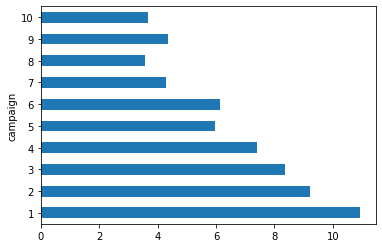

In [233]:
df_camp_infer = pd.crosstab(df_out.campaign, df_out.y)
df_camp_infer['pur_perc'] = df_camp_infer.yes*100/(df_camp_infer.yes + df_camp_infer.no)
df_camp_infer.pur_perc.plot.barh()

In [234]:
df_camp_infer

y,no,yes,pur_perc
campaign,,,
1,14972,1836,10.923370
2,9090,924,9.227082
3,4658,425,8.361204
4,2345,187,7.385466
5,1453,92,5.954693
6,888,58,6.131078
7,583,26,4.269294
8,378,14,3.571429
9,264,12,4.347826


In [236]:
X = df_out.iloc[:,:-1]
y = df_out.y

<AxesSubplot:xlabel='campaign', ylabel='y'>

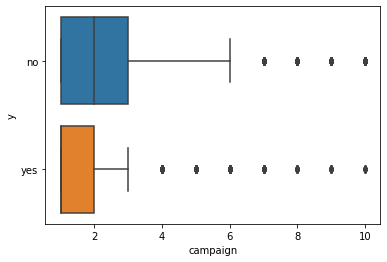

In [248]:
sns.boxplot(x='campaign', y='y', data=df_out)

In [249]:
df.shape

(41188, 21)

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [360]:
df_d = df.drop(df[(df.housing == 'unknown') & (df.loan == 'unknown') & (df.y == 'no')].index, axis=0, inplace=False)

In [361]:
df_d.loan = df_d.loan.map({'yes': 1, 'no': 0})
df_d.housing = df_d.housing.map({'yes': 1, 'no': 0})

In [362]:
df_d['no_of_loans'] = df_d.loan + df_d.housing

In [363]:
df_loans_infer = pd.crosstab(df_d.no_of_loans, df_d.y)
df_loans_infer['pur_perc'] = df_loans_infer.yes*100/(df_loans_infer.yes + df_loans_infer.no)

<AxesSubplot:ylabel='no_of_loans'>

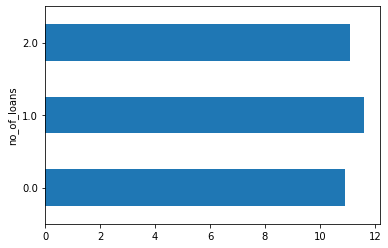

In [364]:
df_loans_infer.pur_perc.plot.barh()

In [365]:
df_d.drop('pdays', axis=1, inplace=True)
df_d.drop('poutcome', axis=1, inplace=True)
df_d.shape

(40305, 20)

In [366]:
df_d1 = df_d.drop(df_d[df_d.job == 'unknown'].index, axis=0, inplace=False)
df_d1 = df_d.drop(df_d[df_d.education == 'unknown'].index, axis=0, inplace=False)
df_d1.shape

(38609, 20)

In [367]:
df_d1.y.value_counts()

no     34220
yes     4389
Name: y, dtype: int64

In [370]:
df_d2 = df_d1[df_d1.duration > 5]
df_d2.shape

(38557, 20)

In [358]:
for i in df_d2:
    if df_d2[i].dtype in ['object','bool']:
        print(f"_________{i}_________")
        print(df_d2[i].value_counts())

_________job_________
admin.           9966
blue-collar      8573
technician       6403
services         3724
management       2732
retired          1591
entrepreneur     1364
self-employed    1352
housemaid         993
unemployed        968
student           695
unknown           196
Name: job, dtype: int64
_________marital_________
married     23335
single      10837
divorced     4315
unknown        70
Name: marital, dtype: int64
_________education_________
university.degree      11912
high.school             9303
basic.9y                5894
professional.course     5126
basic.4y                4068
basic.6y                2236
illiterate                18
Name: education, dtype: int64
_________default_________
no         30708
unknown     7846
yes            3
Name: default, dtype: int64
_________contact_________
cellular     24660
telephone    13897
Name: contact, dtype: int64
_________month_________
may    12906
jul     6662
aug     5870
jun     4904
nov     3910
apr     2457
oct 

In [359]:
df_d2.drop(df_d2[df_d2.job == 'unknown'].index, axis=0, inplace=True)
df_d2.drop(df_d2[df_d2.marital == 'unknown'].index, axis=0, inplace=True)
df_d2.shape

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(38295, 20)

# Label encode

In [286]:
le = LabelEncoder()

In [287]:
def label_encode(df):
    classes = {}
    for i in df:
        if df[i].dtype in ['object', 'bool']:
            df[i] = le.fit_transform(df[i])
            classes.update(**{i: le.classes_})
            
    return classes

In [288]:
classes = label_encode(df_d2)
classes

<ipython-input-287-fb453177e337>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = le.fit_transform(df[i])


{'job': array(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
        'retired', 'self-employed', 'services', 'student', 'technician',
        'unemployed', 'unknown'], dtype=object),
 'marital': array(['divorced', 'married', 'single'], dtype=object),
 'education': array(['basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate',
        'professional.course', 'university.degree'], dtype=object),
 'default': array(['no', 'unknown'], dtype=object),
 'month': array(['apr', 'aug', 'dec', 'jul', 'jun', 'mar', 'may', 'nov', 'oct',
        'sep'], dtype=object),
 'day_of_week': array(['fri', 'mon', 'thu', 'tue', 'wed'], dtype=object),
 'y': array(['no', 'yes'], dtype=object)}

In [371]:
df_d2.shape

(38557, 20)

In [290]:
from sklearn.preprocessing import scale

In [291]:
nr_em = df_d2.nr_employed

In [295]:
for i in df_d2:
    if i in ['cons_price_idx', 'cons_conf_idx', 'nr_employed']:
        df_d2[i] = scale(df_d2[i])

<ipython-input-295-36b7a36d2811>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_d2[i] = scale(df_d2[i])
<ipython-input-295-36b7a36d2811>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_d2[i] = scale(df_d2[i])
<ipython-input-295-36b7a36d2811>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

In [296]:
df_d2.head()

,age,job,marital,education,default,housing,loan,month,day_of_week,duration,campaign,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,dur_bin,no_of_loans
4,56,7,1,3,0,0.0,1.0,6,1,5.116667,1,0,1.1,0.717949,0.90585,4.857,0.404312,0,0,1.0
8,24,9,2,5,0,1.0,0.0,6,1,6.333333,1,0,1.1,0.717949,0.90585,4.857,0.404312,0,0,1.0
16,35,1,1,1,0,1.0,0.0,6,1,5.200000,1,0,1.1,0.717949,0.90585,4.857,0.404312,0,0,1.0
17,46,1,1,1,1,1.0,1.0,6,1,7.333333,1,0,1.1,0.717949,0.90585,4.857,0.404312,0,0,2.0
18,50,1,1,2,0,1.0,1.0,6,1,5.883333,1,0,1.1,0.717949,0.90585,4.857,0.404312,0,0,2.0


In [333]:
df_d2.drop(df_d2[(df_d2.housing.isna()) & (df_d2.loan.isna())].index, axis=0, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


# split for feature selection

In [334]:
X = pd.concat([df_d2.iloc[:, :-3], df_d2.iloc[:,-2:]], axis=1)
y = df_d2.y

In [326]:
X.shape

(10543, 19)

In [336]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=10)

model.fit(X, y)

RandomForestClassifier(random_state=10)

In [342]:
feature_imp = pd.DataFrame(model.feature_importances_, index=X.columns).sort_values(0, ascending=False)

In [343]:
feature_imp

,0
duration,0.215069
euribor3m,0.132211
age,0.107337
dur_bin,0.065816
nr_employed,0.060488
job,0.058094
campaign,0.053858
education,0.049167
day_of_week,0.048695
marital,0.028515


{'job': array(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
        'retired', 'self-employed', 'services', 'student', 'technician',
        'unemployed', 'unknown'], dtype=object),
 'marital': array(['divorced', 'married', 'single'], dtype=object),
 'education': array(['basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate',
        'professional.course', 'university.degree'], dtype=object),
 'default': array(['no', 'unknown'], dtype=object),
 'month': array(['apr', 'aug', 'dec', 'jul', 'jun', 'mar', 'may', 'nov', 'oct',
        'sep'], dtype=object),
 'day_of_week': array(['fri', 'mon', 'thu', 'tue', 'wed'], dtype=object),
 'y': array(['no', 'yes'], dtype=object)}